In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("Instagram_data.csv", encoding = 'latin1')
data.head(10)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
5,3884,2046,1214,329,43,74,7,10,144,9,2,Here are some of the most important soft skill...,#data #datascience #dataanalysis #dataanalytic...
6,2621,1543,599,333,25,22,5,1,76,26,0,Learn how to analyze a candlestick chart as a ...,#stockmarket #investing #stocks #trading #mone...
7,3541,2071,628,500,60,135,4,9,124,12,6,Here are some of the best books that you can f...,#python #pythonprogramming #pythonprojects #py...
8,3749,2384,857,248,49,155,6,8,159,36,4,Here are some of the best data analysis projec...,#dataanalytics #datascience #data #machinelear...
9,4115,2609,1104,178,46,122,6,3,191,31,6,Here are two best ways to count the number of ...,#python #pythonprogramming #pythonprojects #py...


In [8]:
data.isnull().sum()
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


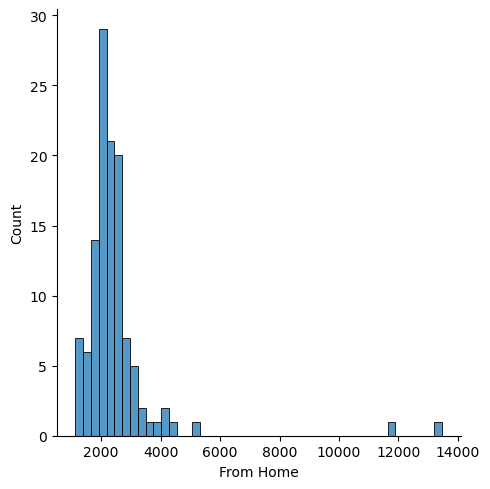

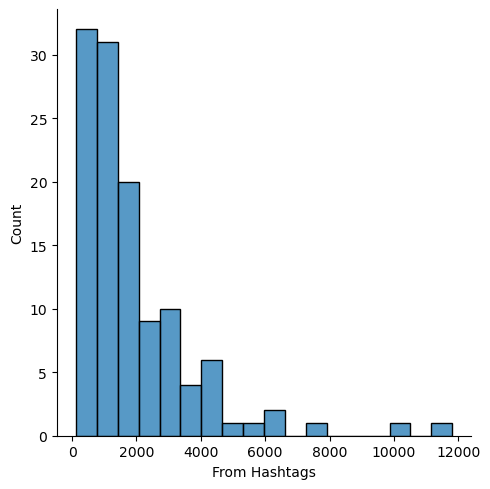

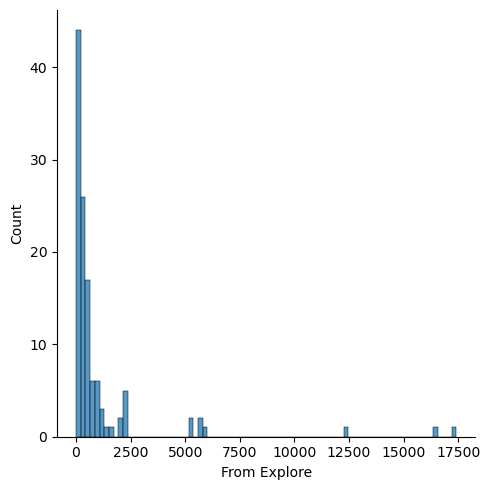

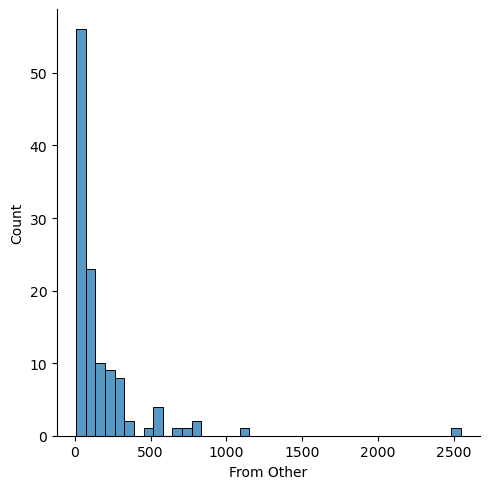

In [71]:
sns.displot(data['From Home'])
sns.displot(data['From Hashtags'])
sns.displot(data['From Explore'])
sns.displot(data['From Other'])

<AxesSubplot:>

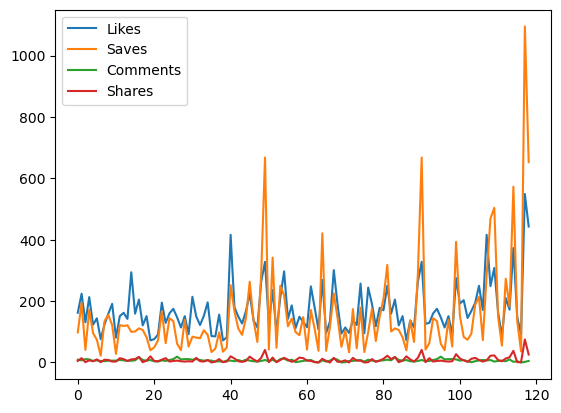

In [59]:
first_impression = data[['Likes', 'Saves', 'Comments', 'Shares']]
first_impression.plot()

<AxesSubplot:>

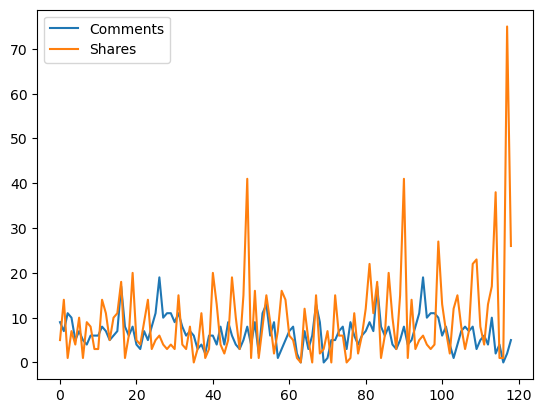

In [60]:
second_impression = data[['Comments', 'Shares']]
second_impression.plot()

In [69]:
likes = data['Likes'].sum()
comments = data['Comments'].sum()
saves = data['Saves'].sum()
shares = data['Shares'].sum()

labels = ['Likes', 'Comments', 'Saves', 'Shares']
values = [likes, comments, saves, shares]

fig = px.pie(data, values=values, names=labels, title="Engagement on Instagram posts", hole = 0.5)
fig.show()

In [72]:
home = data['From Home'].sum()
hashtag = data['From Hashtags'].sum()
explore = data['From Explore'].sum()
other = data['From Other'].sum()

labels = ['Homepage', 'Hashtags', 'Explore page', 'Other']
values = [home, hashtag, explore, other]

fig = px.pie(data, values=values, names=labels, title="Engagement Source", hole = 0.5)
fig.show()

In [74]:
fig2 = px.scatter(data_frame = data, x="Impressions", y="From Home", size="From Home", trendline="ols", title="Relationship between Homepage and Impressions")
fig2.show()

In [77]:
fig3 = px.scatter(data_frame = data, x="Impressions", y="From Hashtags", size="From Hashtags", trendline="ols", title="Relationship between Hashtags and Impressions")
fig3.show()

In [85]:
fig3 = px.scatter(data_frame = data, x="Likes", y="Shares", size="Shares", trendline="ols", title="Relationship between Likes and Shares")
fig3.show()

In [82]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [86]:
conversion_rate = (data["Follows"].sum()/ data["Profile Visits"].sum())*100
print(conversion_rate)

41.00265604249668


In [ ]:
#Sources:
#codes: https://thecleverprogrammer.com/2022/03/22/instagram-reach-analysis-using-python/
#dataset: https://statso.io/instagram-reach-analysis-case-study/